<a href="https://colab.research.google.com/github/mwchuchu/Spam-Email-Classification-with-BOW/blob/main/DH_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Important Libraries.

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
Warning('ignore')
import string
from sklearn.feature_extraction.text import CountVectorizer

#Dataset retrieval


In [2]:
df=pd.read_csv('/content/drive/MyDrive/emails.csv')

In [3]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


#Visualization of dataset.

In [4]:
df.shape

(5728, 2)

we have 5728 rows and 2 columns.

In [5]:
df.columns

Index(['text', 'spam'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [7]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


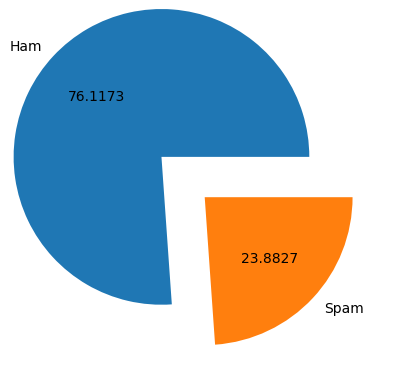

In [8]:
email_type=['Spam']
myexplode = [0.4, 0]
plt.pie(df['spam'].value_counts(),autopct='%.4f',labels=['Ham','Spam'],explode=myexplode)
plt.show()

In [ ]:
pd.value_counts(df['spam'])

<ipython-input-9-13e805032b69>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['spam'])


,count
spam,
0,4360
1,1368


we have 1368 spam and 4360 ham messages.

#Gathering only spam emails.

In [9]:
dt=pd.DataFrame(df)

In [52]:
dt['spam_emails']=df['text'].where(df['spam']==1)

In [53]:
dt['spam_emails'].head()

,spam_emails
0,Subject: naturally irresistible your corporate...
1,Subject: the stock trading gunslinger fanny i...
2,Subject: unbelievable new homes made easy im ...
3,Subject: 4 color printing special request add...
4,"Subject: do not have money , get software cds ..."


In [33]:
dt['spam_emails'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5728 entries, 0 to 5727
Series name: spam_emails
Non-Null Count  Dtype 
--------------  ----- 
1368 non-null   object
dtypes: object(1)
memory usage: 44.9+ KB


#Normalizing data.

###loading english stop words

In [70]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

###Downloading Punkt.

In [35]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
stopwords=nltk.corpus.stopwords.words('english')

###Converting spam emails to lower case.

In [54]:
dt['spam_emails']=dt['spam_emails'].str.lower()

In [55]:
dt['spam_emails'].head()

,spam_emails
0,subject: naturally irresistible your corporate...
1,subject: the stock trading gunslinger fanny i...
2,subject: unbelievable new homes made easy im ...
3,subject: 4 color printing special request add...
4,"subject: do not have money , get software cds ..."


###Converting object and float type to String.

In [64]:
dt['spam_emails']= dt['spam_emails'].map(lambda x: str(x) if isinstance(x, (float, object)) else x)

###Stopwords removal.

In [71]:
dt['spam_emails']=dt['spam_emails'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

###Reviewing spam emails dataset.

In [76]:
dt['spam_emails'].head()

,spam_emails
0,subject: naturally irresistible corporate iden...
1,subject: stock trading gunslinger fanny merril...
2,subject: unbelievable new homes made easy im w...
3,subject: 4 color printing special request addi...
4,"subject: money , get software cds ! software c..."


In [80]:
dt['spam_emails'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5728 entries, 0 to 5727
Series name: spam_emails
Non-Null Count  Dtype 
--------------  ----- 
5728 non-null   object
dtypes: object(1)
memory usage: 44.9+ KB


#Applying BOW technique.

In [81]:

vectorizer = CountVectorizer(stop_words=None)

X = vectorizer.fit_transform(dt['spam_emails'])

word_counts = X.sum(axis=0)
words = vectorizer.get_feature_names_out()


word_freq_df = pd.DataFrame({'word': words, 'count': word_counts.flat})


word_freq_df = word_freq_df.sort_values(by='count', ascending=False)


print(word_freq_df.head(20))

              word  count
11595          nan   4361
16150      subject   1574
4347           com    999
3473      business    844
4434       company    805
6430         email    804
9212   information    740
11361        money    662
7649          free    606
8768          http    600
7954           get    590
10696         mail    586
12154          one    581
13015       please    581
1              000    560
17561           us    537
4183         click    531
16814         time    521
11755          new    504
10748         make    496


*Frequently used 20 words other than stop words in spam emails are above.*